In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# importa i dati

filename = 'Diff_Distanze.csv'
data=np.genfromtxt(filename,delimiter='\t',skip_header=1)
headers = open(filename).readline().strip().split('\t')
print("righe, colonne:", data.shape)
print("headers:", ", ".join("{}:{}".format(i,s) for (i,s) in enumerate(headers)))

righe, colonne: (4776, 18)
headers: 0:T, 1:X, 2:Y, 3:ERR, 4:DIFF0, 5:DIFF1, 6:DIFF2, 7:DIFF3, 8:DIFF4, 9:DIFF5, 10:DIFF6, 11:DIFF7, 12:DIFF8, 13:DIFF9, 14:DIFF10, 15:DIFF11, 16:DIFF12, 17:DIFF13


In [15]:
# estraggo i dati e sottraggo la media

t = data[:,0] # colonna T
x = data[:,1] # colonna X
y = data[:,2] # colonna Y
v = data[:,4:4+13] # colonne DIFF0...DIFF13
avg = np.nanmean(v,axis=1) # calcolo media dei diff
v = v - avg[:,np.newaxis] # sottraggo la media a ogni diff

percorso


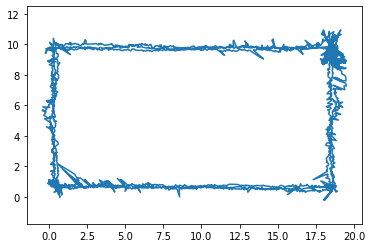

In [16]:
# disegna percorso

plt.plot(x,y)
plt.axis("equal")
print("percorso")

Tracce complete


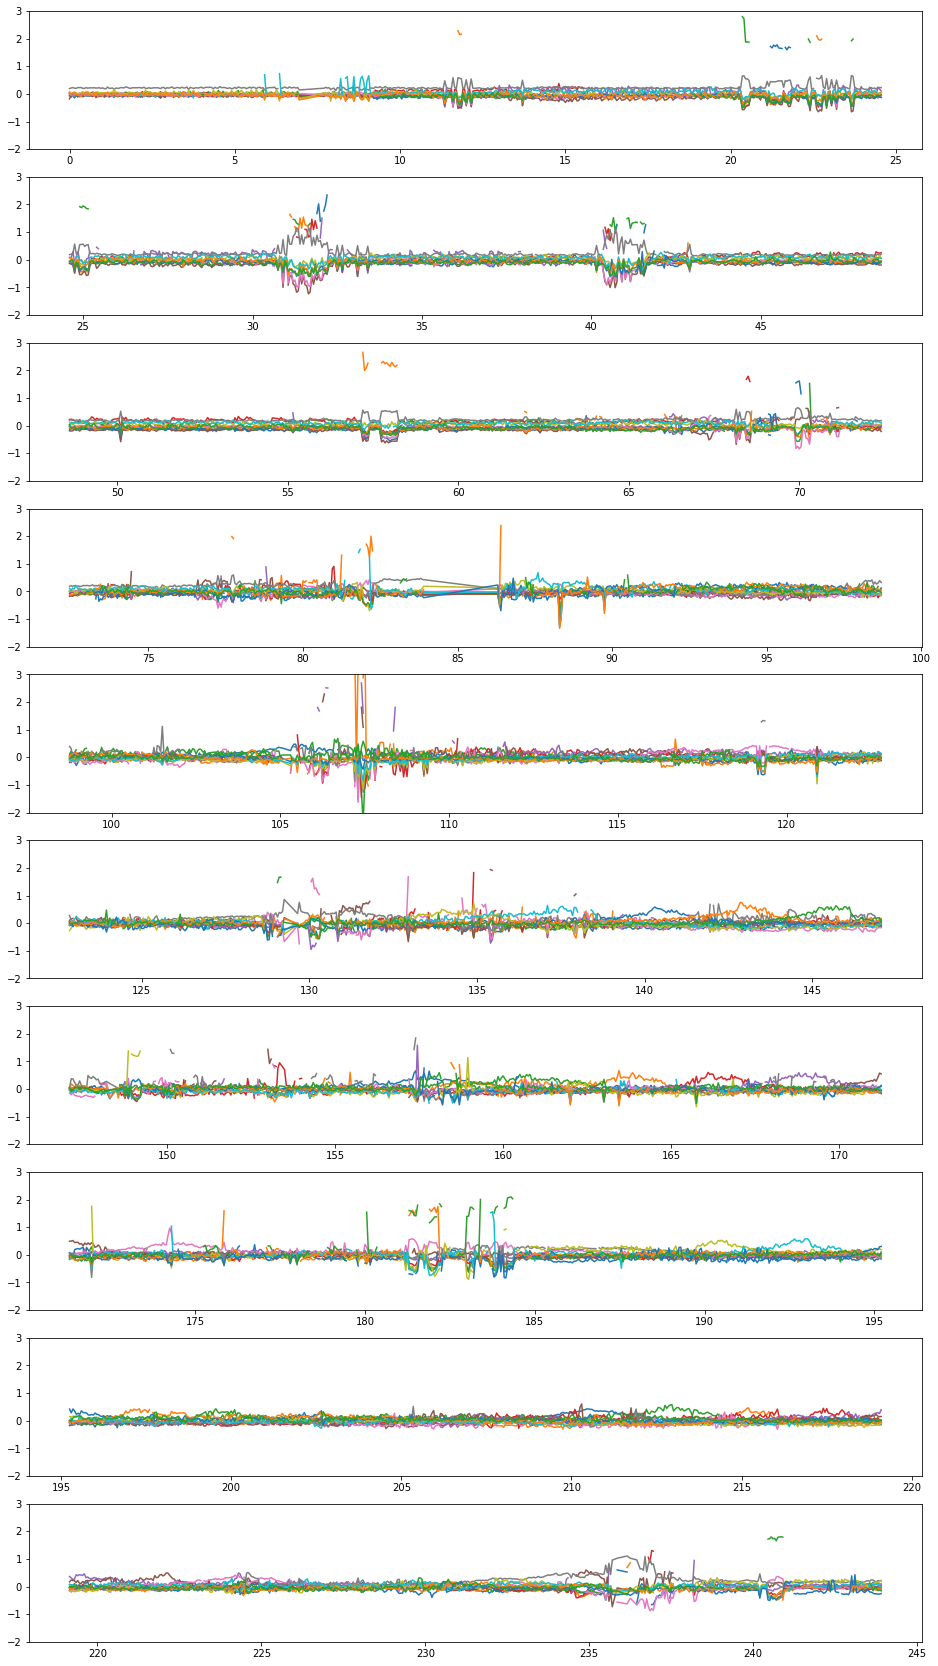

In [17]:
# disegna le tracce complete

N = 10
fig, axs = plt.subplots(N, figsize=(16,30))
for i in range(N):
    start = i*len(t)//N
    end = (i+1)*len(t)//N
    axs[i].set_ylim(-2,3)
    axs[i].plot(t[start:end], v[start:end])
print("Tracce complete")

ingrandimento per 105 < t < 110


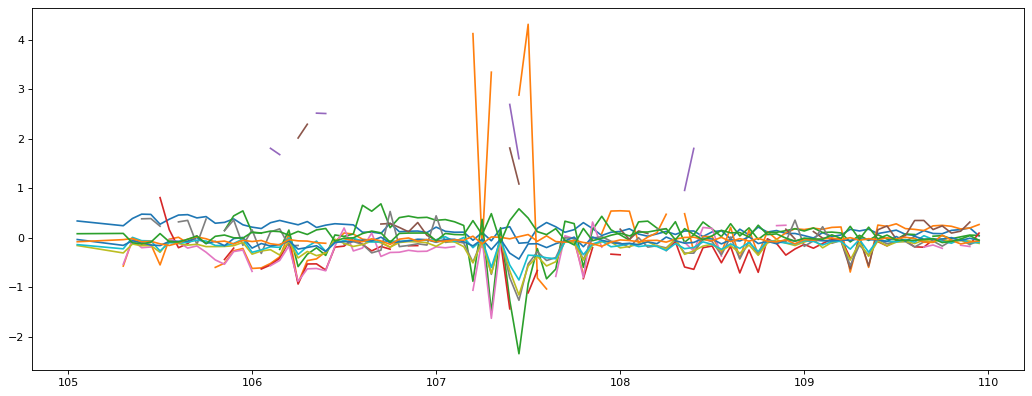

In [23]:
# disegna un ingrandimento temporale
#start, end = 30, 33
start,end = 105, 110
where = (t>start) & (t<end)
figure(figsize=(16, 6), dpi=80)
plt.plot(t[where], v[where]) 
print("ingrandimento per {} < t < {}".format(start,end))

percorso evidenziato per 105 < t 110


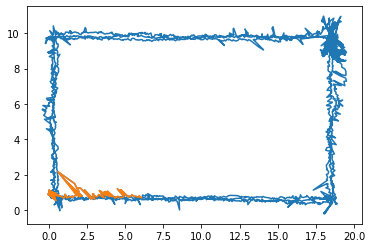

In [24]:
where = (t>start) & (t<end)
plt.plot(x,y)
plt.plot(x[where],y[where])
print("percorso evidenziato per {} < t {}".format(start,end))

In [7]:
# provo a rimuovere gli anchor con errore maggiore di 0.5

w = np.where(np.abs(np.nan_to_num(v,1000))>0.5, np.NaN, v)
avg = np.nanmean(w, axis=1)
w = w - avg[:,np.newaxis] # sottraggo la media a ogni diff

Tracce modificate


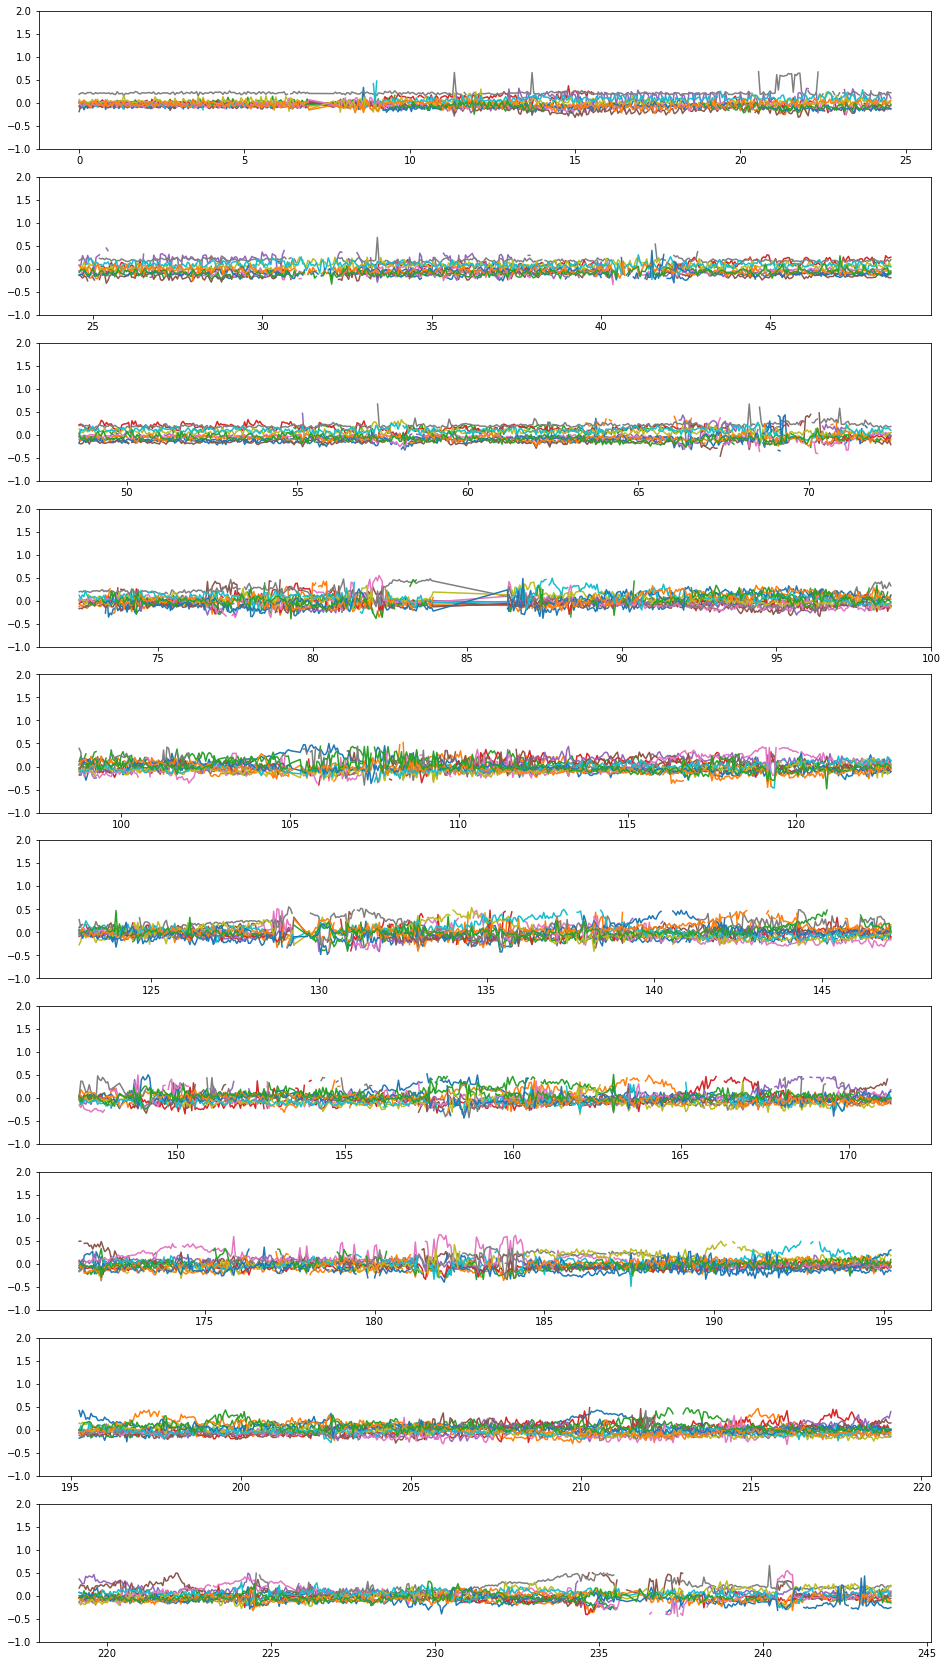

In [8]:
# disegno le tracce modificate

N = 10
fig, axs = plt.subplots(N, figsize=(16,30))
for i in range(N):
    start = i*len(t)//N
    end = (i+1)*len(t)//N
    axs[i].set_ylim(-1,2)
    axs[i].plot(t[start:end], w[start:end])
print("Tracce modificate")

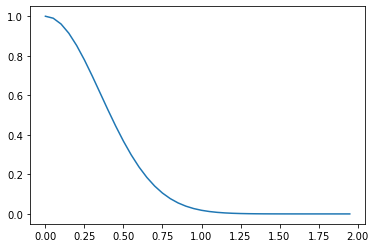

In [9]:
t = np.arange(0,2,0.05)
plt.plot(t,np.exp(-(t/0.5)**2))